# Explore here

In [14]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing import image
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model


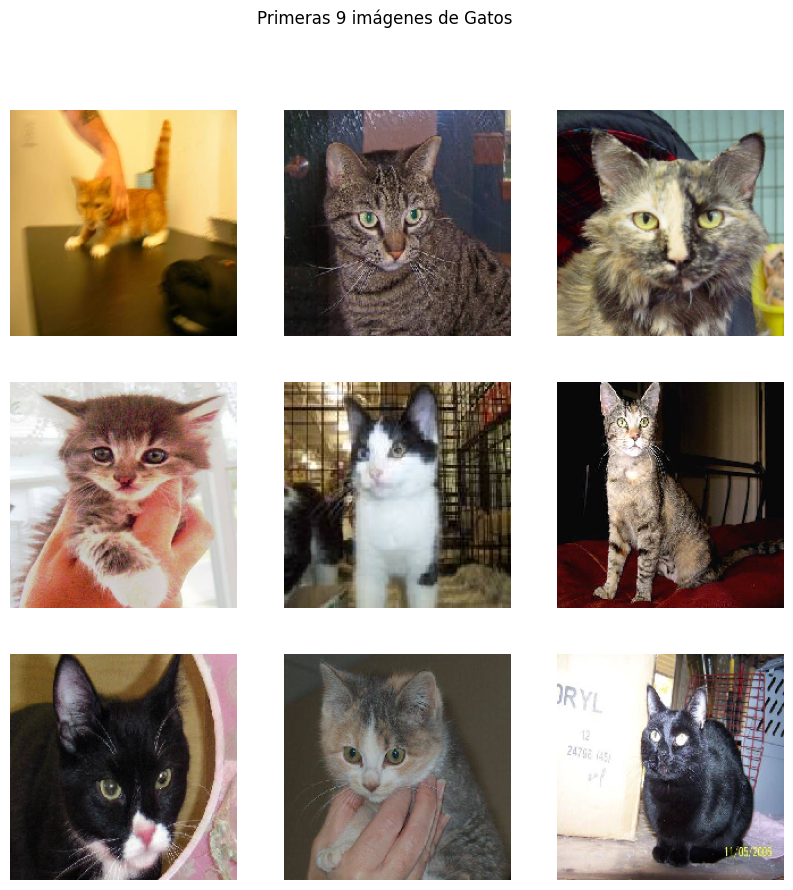

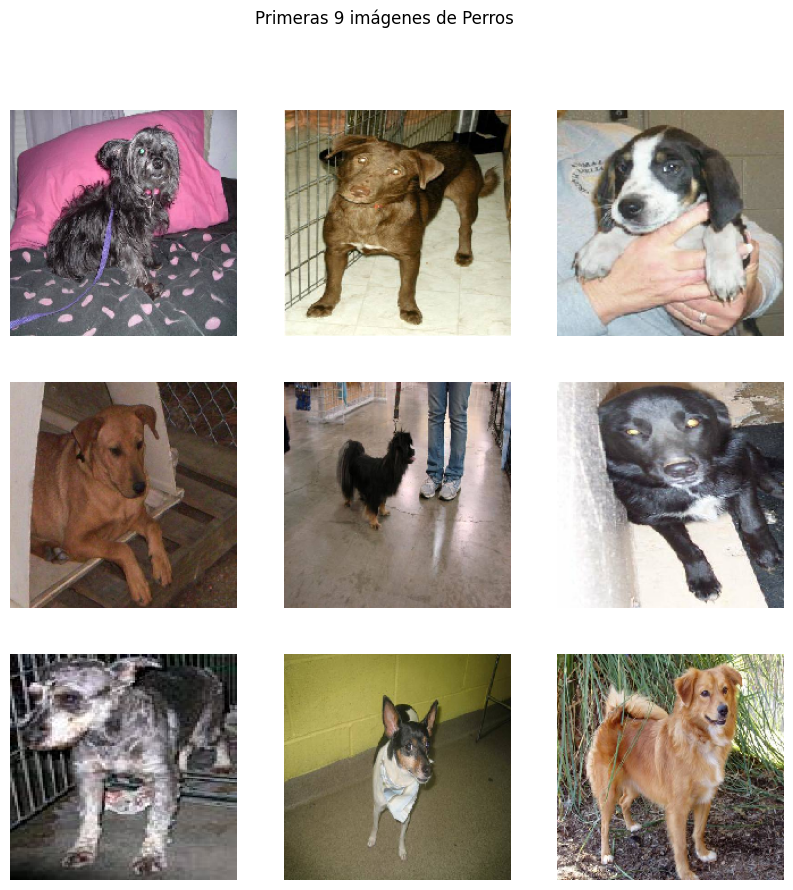

In [15]:
# Rutas a las carpetas de imágenes
train_dir = r'C:\Users\solan\OneDrive\Desktop\4GEEKS\Imagenes-yuju\data\train'
cat_dir = os.path.join(train_dir, 'cat')
dog_dir = os.path.join(train_dir, 'dog')

# Función para mostrar las primeras 9 imágenes de una carpeta
def mostrar_imagenes(ruta, titulo):
    plt.figure(figsize=(10, 10))
    for i, filename in enumerate(os.listdir(ruta)[:9]):
        img_path = os.path.join(ruta, filename)
        img = load_img(img_path, target_size=(200, 200))  # Cargar y redimensionar imagen
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(titulo)
    plt.show()

# Mostrar las imágenes de gatos
mostrar_imagenes(cat_dir, "Primeras 9 imágenes de Gatos")

# Mostrar las imágenes de perros
mostrar_imagenes(dog_dir, "Primeras 9 imágenes de Perros")


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalizar los píxeles a valores entre 0 y 1
    validation_split=0.2  # Reservar el 20% de los datos para validación
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalización para las pruebas

# Configurar el generador de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),  # Tamaño que espera el modelo
    batch_size=32,  # Tamaño del lote
    class_mode='categorical',  # Clasificación multi-clase (gatos y perros)
    subset='training'  # Usar como conjunto de entrenamiento
)

# Configurar el generador de validación
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Usar como conjunto de validación
)

# Configurar el generador de prueba
test_dir = r'C:\Users\solan\OneDrive\Desktop\4GEEKS\Imagenes-yuju\data\test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode=None,  # Sin etiquetas en el conjunto de prueba
    shuffle=False  # Mantener el orden para hacer predicciones
)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [17]:
# Confirmar las clases y el número de imágenes
print("Clases detectadas en el generador de entrenamiento:")
print(train_generator.class_indices)

print("\nNúmero de imágenes:")
print(f"Entrenamiento: {train_generator.samples}")
print(f"Validación: {val_generator.samples}")
print(f"Prueba: {len(test_generator.filenames)}")


Clases detectadas en el generador de entrenamiento:
{'cat': 0, 'dog': 1}

Número de imágenes:
Entrenamiento: 20000
Validación: 5000
Prueba: 0


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Crear el modelo
def create_model():
    model = Sequential()
    
    # Bloque 1
    model.add(Conv2D(input_shape=(200, 200, 3), filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Bloque 2
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Bloque 3
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Bloque 4
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Clasificador
    model.add(Flatten())
    model.add(Dense(units=4096, activation='relu'))  # Capa totalmente conectada con 4096 unidades
    model.add(Dense(units=4096, activation='relu'))  # Otra capa totalmente conectada
    model.add(Dense(units=2, activation='softmax'))  # Capa de salida para 2 clases (cat y dog)

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Crear el modelo
model = create_model()

# Mostrar el resumen del modelo
model.summary()


c:\Users\solan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │   301,993,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 326,418,754 (1.22 GB)

 Trainable params: 326,418,754 (1.22 GB)

 Non-trainable params: 0 (0.00 B)

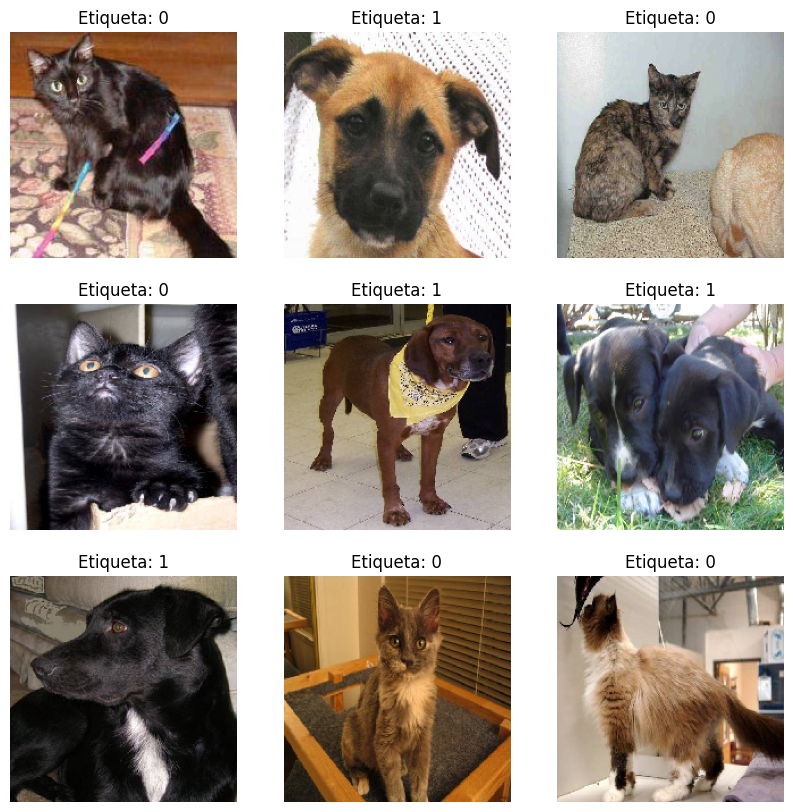

In [19]:

images, labels = next(train_generator)

# Mostrar las primeras 9 imágenes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Etiqueta: {np.argmax(labels[i])}")
    plt.axis('off')
plt.show()


In [20]:

# Configurar ModelCheckpoint para el modelo base
checkpoint_base = ModelCheckpoint(
    'best_model_base.keras',  # Guardar el mejor modelo del modelo base
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Entrenar el modelo base
history_base = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,  # Entrena por 5 épocas
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[checkpoint_base],  # Solo guarda el mejor modelo
    verbose=1
)

# Guardar el modelo completo al final del entrenamiento
model.save('final_model_base.keras')
print("Modelo base guardado como 'final_model_base.keras'")


c:\Users\solan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 36/625 ━━━━━━━━━━━━━━━━━━━━ 50:43 5s/step - accuracy: 0.4649 - loss: 1.4561

KeyboardInterrupt: 

In [ ]:


# Crear un nuevo modelo
model_early = create_model()

# Configurar los callbacks
checkpoint_early = ModelCheckpoint(
    'best_model_early.keras',  # Guardar el mejor modelo entrenado con EarlyStopping
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Detener si no mejora
    patience=3,              # Número de épocas sin mejora
    mode='max',
    verbose=1
)

# Entrenar con EarlyStopping
history_early = model_early.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,  # Máximo de épocas
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[checkpoint_early, early_stopping],
    verbose=1
)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4984 - loss: 0.8491
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_model_early.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 2639s 4s/step - accuracy: 0.4984 - loss: 0.8489 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4996 - loss: 0.6933
Epoch 2: val_accuracy did not improve from 0.50000
625/625 ━━━━━━━━━━━━━━━━━━━━ 2701s 4s/step - accuracy: 0.4996 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4934 - loss: 0.6933
Epoch 3: val_accuracy did not improve from 0.50000
625/625 ━━━━━━━━━━━━━━━━━━━━ 2622s 4s/step - accuracy: 0.4934 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4966 - loss: 0.6933
Epoch 4: val_accuracy did not improve from 0.50000
625/625 ━━━━━━━━━━━━━━━━━━━━ 2494s 4s/step - accuracy: 0.4966 

In [32]:

# Cargar y evaluar el modelo sin EarlyStopping
best_model_base = load_model('best_model_base.keras')
val_loss_base, val_accuracy_base = best_model_base.evaluate(val_generator)
print(f"Modelo base - Pérdida: {val_loss_base}, Precisión: {val_accuracy_base}")

# Cargar y evaluar el modelo con EarlyStopping
best_model_early = load_model('best_model_early.keras')
val_loss_early, val_accuracy_early = best_model_early.evaluate(val_generator)
print(f"Modelo con EarlyStopping - Pérdida: {val_loss_early}, Precisión: {val_accuracy_early}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 136s 858ms/step - accuracy: 0.4992 - loss: 0.6933
Modelo base - Pérdida: 0.6932453513145447, Precisión: 0.5
157/157 ━━━━━━━━━━━━━━━━━━━━ 133s 845ms/step - accuracy: 0.4866 - loss: 0.6934
Modelo con EarlyStopping - Pérdida: 0.6931732892990112, Precisión: 0.5


Realizando predicciones con el modelo base...


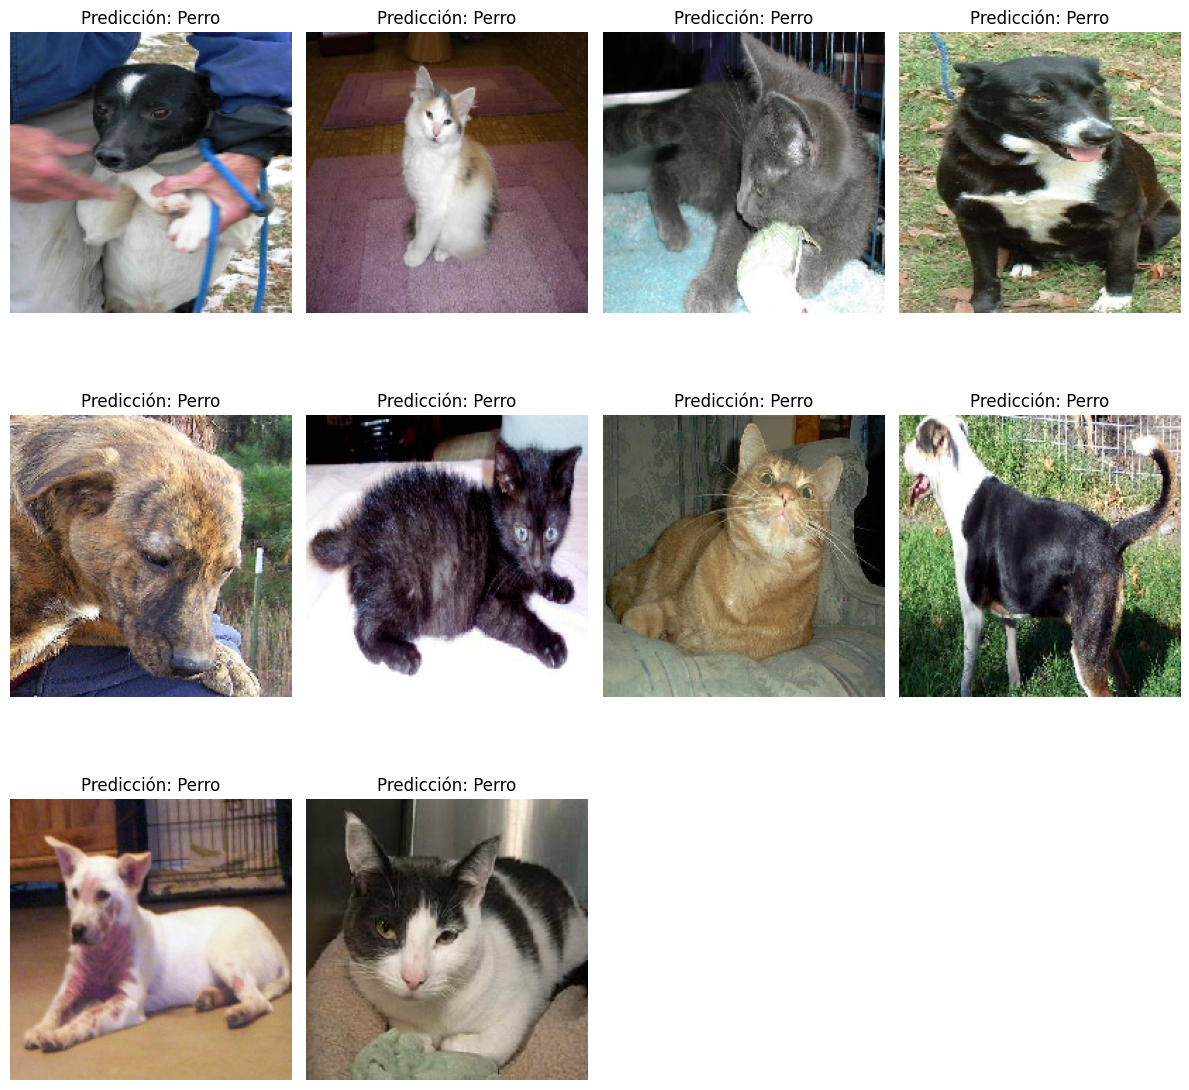

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Cargar el modelo 
model_path = r'C:\Users\solan\OneDrive\Desktop\4GEEKS\Imagenes-yuju\src\best_model_base.keras'
best_model_base = load_model(model_path)

# Ruta al directorio de prueba
test_dir = r'C:\Users\solan\OneDrive\Desktop\4GEEKS\Imagenes-yuju\data\test'

# Mapear índices de clases a etiquetas (gato: 0, perro: 1)
class_labels = {0: 'Gato', 1: 'Perro'}

# Mostrar las primeras 10 imágenes de prueba con predicciones del modelo base
plt.figure(figsize=(12, 12))
print("Realizando predicciones con el modelo base...")

for i, filename in enumerate(os.listdir(test_dir)[:10]):  # Obtener las primeras 10 imágenes
    # Ruta completa a la imagen
    img_path = os.path.join(test_dir, filename)
    
    # Cargar la imagen y preprocesarla
    img = load_img(img_path, target_size=(200, 200))  # Redimensionar a 200x200
    img_array = img_to_array(img) / 255.0  # Normalizar
    img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión para el batch

    # Realizar predicción con el modelo base
    prediction = best_model_base.predict(img_array, verbose=0)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Mostrar la imagen y la predicción
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Predicción: {class_labels[predicted_class]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Fin del ejercicio